In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [23]:
df=pd.read_csv("studentPerformance.csv")

In [24]:
df.head(10)

,math score,reading score,writing score,placement score,club join date,offer count
0,73.0,88.0,77.0,99.0,2018.0,3.0
1,95.0,82.0,71.0,78.0,2021.0,2.0
2,61.0,100.0,76.0,60.0,2019.0,2.0
3,63.0,85.0,NaN,75.0,NaN,NaN
4,74.0,75.0,72.0,83.0,2020.0,2.0
5,76.0,80.0,66.0,70.0,2018.0,2.0
6,69.0,88.0,79.0,81.0,2021.0,2.0
7,NaN,85.0,74.0,96.0,2021.0,3.0
8,75.0,77.0,75.0,85.0,2019.0,3.0
9,68.0,95.0,55.0,91.0,2020.0,1.0


In [30]:
df.isnull().sum()

,0
math score,0
reading score,0
writing score,0
placement score,0
club join date,2
offer count,2


In [31]:
df=pd.read_csv("studentPerformance.csv")
df['math score'] = df['math score'].fillna(df['math score'].mean())
df['reading score']=df['reading score'].fillna(df['reading score'].mean())
df['writing score']=df['writing score'].fillna(df['writing score'].mean())
df['placement score']=df['placement score'].fillna(df['placement score'].mean())
df['club join date']=df['club join date'].fillna(df['club join date'].mode())
df['offer count']=df['offer count'].fillna(df['offer count'].mode())

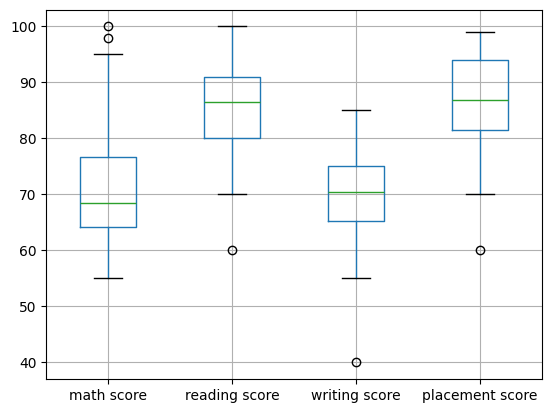

In [32]:
col = ['math score', 'reading score' , 'writing score','placement score']
df.boxplot(col)
plt.show()

In [33]:
print(np.where(df['math score']>80))
print(np.where(df['reading score']<70))
print(np.where(df['writing score']<50))
print(np.where(df['placement score']<70))

(array([ 1, 26, 29]),)
(array([19]),)
(array([26]),)
(array([2]),)


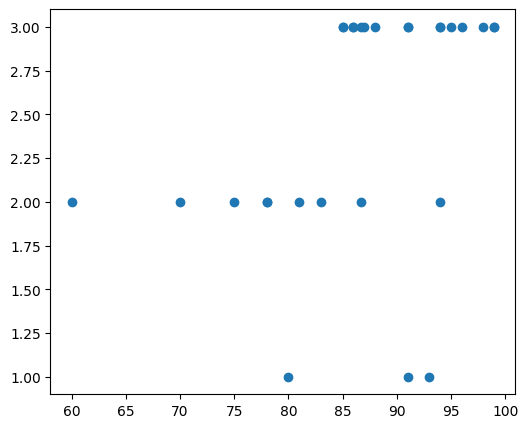

In [34]:
fig, ax = plt.subplots(figsize = (6,5))
ax.scatter(df['placement score'], df['offer count'])
plt.show()

In [35]:
print(np.where((df['placement score']<75) & (df['offer count']>1)))
print(np.where((df['placement score']>85) & (df['offer count']<3)))

(array([2, 5]),)
(array([ 9, 11, 16, 26]),)


OUTLIERS

In [36]:
z = np.abs(stats.zscore(df['math score']))
print(z)

[0.11090164 2.18106558 1.01827869 0.83008197 0.205      0.39319672
 0.2654918  0.         0.29909836 0.35959017 0.73598361 0.35959017
 1.01827869 0.67549181 0.48729508 0.83008197 0.48729508 0.
 1.58286886 0.64188525 0.67549181 0.64188525 0.54778689 0.45368853
 0.76959017 1.01827869 2.65155739 0.73598361 0.35959017 2.46336067]


In [37]:
threshold = 1.00
sample_outliers = np.where(z >threshold)
sample_outliers

(array([ 1,  2, 12, 18, 25, 26, 29]),)

In [38]:
sorted_rscore= sorted(df['reading score'])
q1 = np.percentile(sorted_rscore, 25)
q3 = np.percentile(sorted_rscore, 75)
print(q1,q3)

80.0 91.0


In [39]:
IQR = q3-q1
lwr_bound = q1-(0.5*IQR)
upr_bound = q3+(0.5*IQR)
print(lwr_bound, upr_bound)

74.5 96.5


In [42]:
r_outliers = []
for i in sorted_rscore:
  if (i <lwr_bound or i>upr_bound):
    r_outliers.append(i)
print(r_outliers)

[60.0, 70.0, 70.0, 98.0, 100.0]
